In [3]:
import re
import pandas as pd

In [4]:
f = open("dataset/And_Casa DDD-7.txt ",'r',encoding='utf-8')

In [5]:
data = f.read()

In [6]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{1,2}'

In [7]:
messages = re.split(pattern, data)[2:]
len(messages)

364

In [8]:
dates = re.findall(pattern, data)[1:]
len(dates)

364

In [9]:
df = pd.DataFrame({'user_message':messages, 'message_date': dates})
df

,user_message,message_date
0,PM - You were added\n,"2/5/23, 9:59"
1,PM - Udit Khanna Cgc Khanne: Rent guyss????\n,"7/18/23, 6:55"
2,PM - Udit Khanna Cgc Khanne: 5000 daldijyee\n,"7/18/23, 6:55"
3,PM - Jay Jain👑: <Media omitted>\n,"7/18/23, 6:56"
4,PM - Jay Jain👑: Jay Jain\n2003213\n,"7/18/23, 6:56"
...,...,...
359,PM - Udit Khanna Cgc Khanne: @919685257038 3...,"1/29/24, 2:15"
360,PM - Jay Jain👑: 105 @918627889728\n,"1/29/24, 2:15"
361,PM - Jay Jain👑: 105 @917014684088\n,"1/29/24, 2:17"
362,PM - Jay Jain👑: <Media omitted>\n,"2/1/24, 10:04"


In [10]:
df['message_date'] = pd.to_datetime(df['message_date'])

In [11]:
df['user_message'].replace(to_replace=r'^\u202f(PM|AM) - ',value='',regex=True,inplace=True)
df

,user_message,message_date
0,You were added\n,2023-02-05 09:59:00
1,Udit Khanna Cgc Khanne: Rent guyss????\n,2023-07-18 06:55:00
2,Udit Khanna Cgc Khanne: 5000 daldijyee\n,2023-07-18 06:55:00
3,Jay Jain👑: <Media omitted>\n,2023-07-18 06:56:00
4,Jay Jain👑: Jay Jain\n2003213\n,2023-07-18 06:56:00
...,...,...
359,Udit Khanna Cgc Khanne: @919685257038 300\n,2024-01-29 02:15:00
360,Jay Jain👑: 105 @918627889728\n,2024-01-29 02:15:00
361,Jay Jain👑: 105 @917014684088\n,2024-01-29 02:17:00
362,Jay Jain👑: <Media omitted>\n,2024-02-01 10:04:00


In [12]:
users = []
messages = []
for msg in df['user_message']:
    entry = re.split('([\w\W]+?):\s',msg)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'],inplace=True)
df.head()

,message_date,user,message
0,2023-02-05 09:59:00,group_notification,You were added\n
1,2023-07-18 06:55:00,Udit Khanna Cgc Khanne,Rent guyss????\n
2,2023-07-18 06:55:00,Udit Khanna Cgc Khanne,5000 daldijyee\n
3,2023-07-18 06:56:00,Jay Jain👑,<Media omitted>\n
4,2023-07-18 06:56:00,Jay Jain👑,Jay Jain\n2003213\n


In [13]:
df['user'].unique()

array(['group_notification', 'Udit Khanna  Cgc Khanne', 'Jay Jain👑',
       'Yusuf Chacha 🧔🏼', 'Rohan Darling❤️ Non Elite',
       'Gajju Eveningstar😈', 'Puniya Baby 😘😘', 'Peaky🕵🏻\u200d♂️'],
      dtype=object)

In [14]:
df['year'] = df['message_date'].dt.year
df['month'] = df['message_date'].dt.month_name()
df['day'] = df['message_date'].dt.day

df['hour'] = df['message_date'].dt.hour
df['minute'] = df['message_date'].dt.minute
df.head()

,message_date,user,message,year,month,day,hour,minute
0,2023-02-05 09:59:00,group_notification,You were added\n,2023,February,5,9,59
1,2023-07-18 06:55:00,Udit Khanna Cgc Khanne,Rent guyss????\n,2023,July,18,6,55
2,2023-07-18 06:55:00,Udit Khanna Cgc Khanne,5000 daldijyee\n,2023,July,18,6,55
3,2023-07-18 06:56:00,Jay Jain👑,<Media omitted>\n,2023,July,18,6,56
4,2023-07-18 06:56:00,Jay Jain👑,Jay Jain\n2003213\n,2023,July,18,6,56


In [15]:
df[df['user']==df['user'].unique()[0]].shape[0]

3

In [16]:
words = []
for msg in df['message']:
    words.extend(msg.split())
len(words)

1653

In [17]:
df[df['message'] == '<Media omitted>\n'].shape[0]

46

In [18]:
from urlextract import URLExtract
extractor = URLExtract()

In [19]:
links = []
for msg in df['message']:
    links.extend(extractor.find_urls(msg))
len(links)

4

In [20]:
x = df['user'].value_counts().head()

c:\Users\taler\anaconda3\envs\whatsappenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\taler\anaconda3\envs\whatsappenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129492 (\N{BEARDED PERSON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\taler\anaconda3\envs\whatsappenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


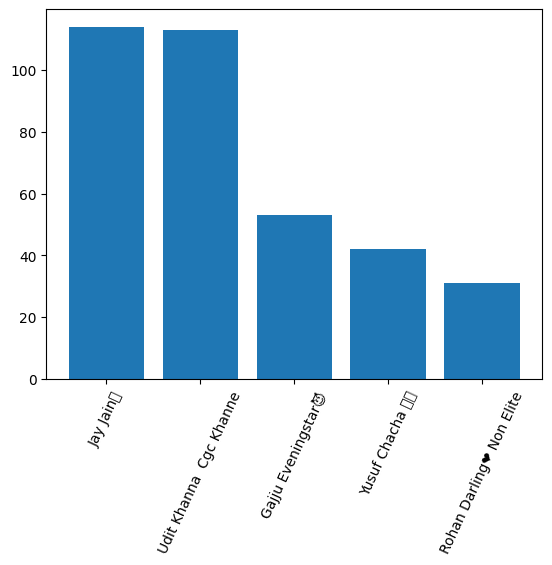

In [21]:
import matplotlib.pyplot as plt 
plt.bar(x.index,x.values)
plt.xticks(rotation=65)
plt.show()

In [22]:
x = round(df['user'].value_counts()/df.shape[0] *100,2)
x

Jay Jain👑                    31.32
Udit Khanna  Cgc Khanne      31.04
Gajju Eveningstar😈           14.56
Yusuf Chacha 🧔🏼              11.54
Rohan Darling❤️ Non Elite     8.52
Puniya Baby 😘😘                1.10
Peaky🕵🏻‍♂️                    1.10
group_notification            0.82
Name: user, dtype: float64

c:\Users\taler\anaconda3\envs\whatsappenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\taler\anaconda3\envs\whatsappenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129492 (\N{BEARDED PERSON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\taler\anaconda3\envs\whatsappenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\taler\anaconda3\envs\whatsappenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128373 (\N{SLEUTH OR SPY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\taler\anaconda3\envs\whatsappenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2})

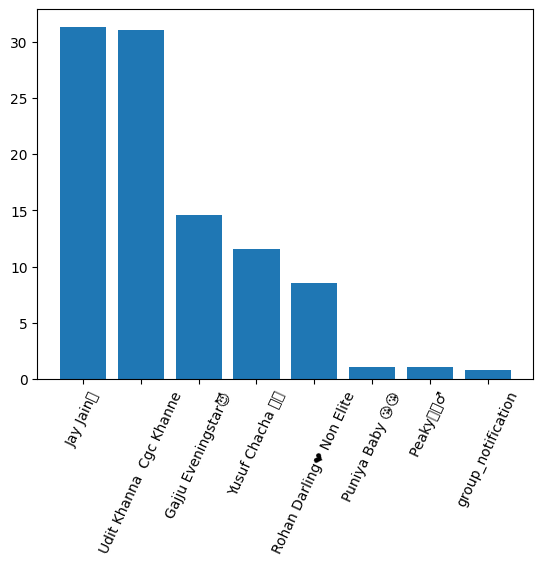

In [23]:
plt.bar(x.index,x.values)
plt.xticks(rotation=65)
plt.show()


In [24]:
df[df['message']!='<Media omitted>\n']

,message_date,user,message,year,month,day,hour,minute
0,2023-02-05 09:59:00,group_notification,You were added\n,2023,February,5,9,59
1,2023-07-18 06:55:00,Udit Khanna Cgc Khanne,Rent guyss????\n,2023,July,18,6,55
2,2023-07-18 06:55:00,Udit Khanna Cgc Khanne,5000 daldijyee\n,2023,July,18,6,55
4,2023-07-18 06:56:00,Jay Jain👑,Jay Jain\n2003213\n,2023,July,18,6,56
5,2023-07-18 07:26:00,Udit Khanna Cgc Khanne,+20\n,2023,July,18,7,26
...,...,...,...,...,...,...,...,...
358,2024-01-29 02:15:00,Udit Khanna Cgc Khanne,@919131183997 310\n,2024,January,29,2,15
359,2024-01-29 02:15:00,Udit Khanna Cgc Khanne,@919685257038 300\n,2024,January,29,2,15
360,2024-01-29 02:15:00,Jay Jain👑,105 @918627889728\n,2024,January,29,2,15
361,2024-01-29 02:17:00,Jay Jain👑,105 @917014684088\n,2024,January,29,2,17


In [25]:
df[df['user']=='Puniya Baby 😘😘']

,message_date,user,message,year,month,day,hour,minute
48,2023-08-02 03:08:00,Puniya Baby 😘😘,<Media omitted>\n,2023,August,2,3,8
49,2023-08-02 03:08:00,Puniya Baby 😘😘,"सादर जयजिनेंद्र , \nबहुत ही हर्ष के साथ ' नलवा...",2023,August,2,3,8
50,2023-08-02 03:09:00,Puniya Baby 😘😘,सभी भाइयो को अवश्य पधारना है\n,2023,August,2,3,9
55,2023-08-02 06:43:00,Puniya Baby 😘😘,उन में आप भी आते हो\n,2023,August,2,6,43


In [26]:
from wordcloud import WordCloud

In [27]:
import requests
url = "https://hindityping.info/download/assets/Hindi-Fonts-Unicode/gargi.ttf"

r = requests.get(url, allow_redirects=True)
font_path="font/gargi.ttf"

with open(font_path, "wb") as fw:
  fw.write(r.content)

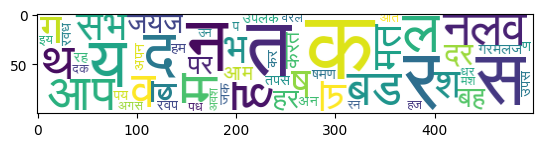

In [28]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=100,min_font_size=10,background_color='white',font_path=font_path)
df = df[df['user']=='Puniya Baby 😘😘']
df = df[df['message']!='<Media omitted>\n']
df = df[df['message'] != '\u200eimage omitted\n']
df = df[df['message']!='\u200esticker omitted\n']

df_wc = wc.generate(df['message'].str.cat(sep=" "))
plt.imshow(df_wc)